In [211]:
from idlelib.colorizer import color_config

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report as cr
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import time

In [212]:
iris = load_iris(as_frame=True)
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.frame['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

<Axes: >

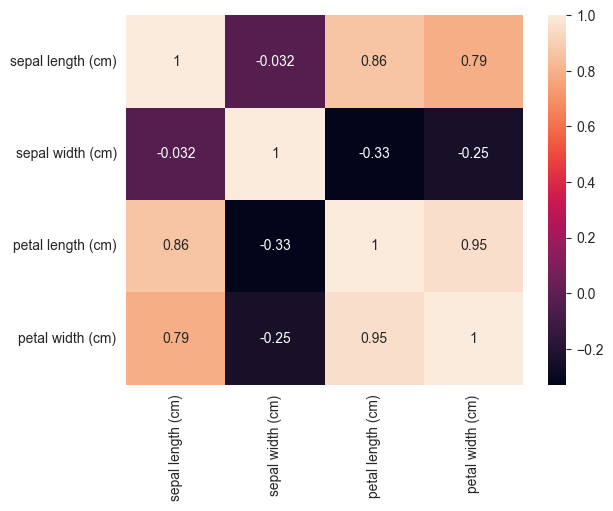

In [213]:
sns.heatmap(X_train.corr(), annot=True)

По корреляционной карте заметим, что меньше всего коррелируют sepal width and length, можно ли выбрать один признак?

In [214]:
md1=GaussianNB().fit(X_train, y_train)
md2=LogisticRegression(max_iter=110).fit(X_train, y_train)

In [215]:
nb_pred=md1.predict(X_test)
print(cr(y_test,nb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.96      1.00      0.98        23
           2       1.00      0.96      0.98        23

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [216]:
lr_pred=md2.predict(X_test)
print(cr(y_test,lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        23

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [217]:
scaler=StandardScaler()
scaled=scaler.fit_transform(X)
X=pd.DataFrame(scaled,index=X.index,columns=X.columns)

In [218]:
pca = PCA(n_components=4)
pca.fit(X,y)
print(pca.singular_values_)
print(pca.explained_variance_)

[20.92306556 11.7091661   4.69185798  1.76273239]
[2.93808505 0.9201649  0.14774182 0.02085386]


Вес вектора в разложении определяется собственным значением, значит первый вектор в разы лучше остальных в задаче разложения 20.9>18,5, но не на порядок, можно предположить что 
можно будет получена прямая пропорциональность качества классификации и числа признаков

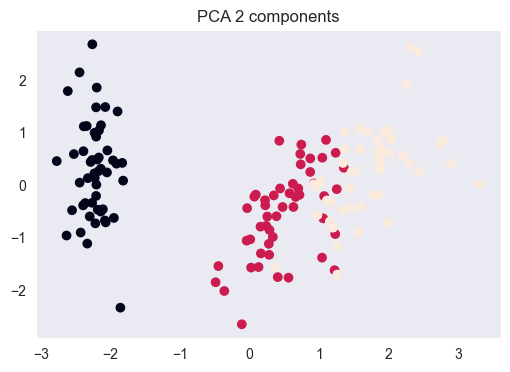

In [239]:
pca=PCA(n_components=2).fit(X,y)
X_pca=pca.transform(X)
fig = plt.figure(figsize=(6,4))
legend=[]
plt.title('PCA 2 components')
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
plt.grid()
plt.show()

Становится очевидным, что при проецировании на одну ось будет получена более плохая картина, 
пробовать выделить одну компоненту с помощью PCA и обучать модели, получать предсказания нет смысла

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.5, random_state=42)
md1=GaussianNB().fit(X_train, y_train)
md2=LogisticRegression(max_iter=110).fit(X_train, y_train)
nb_pred=md1.predict(X_test)
lr_pred=md2.predict(X_test)

In [241]:
print(cr(y_test,nb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.83      0.87      0.85        23
           2       0.86      0.83      0.84        23

    accuracy                           0.91        75
   macro avg       0.90      0.90      0.90        75
weighted avg       0.91      0.91      0.91        75



In [242]:
print(cr(y_test, lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.91      0.91      0.91        23
           2       0.91      0.91      0.91        23

    accuracy                           0.95        75
   macro avg       0.94      0.94      0.94        75
weighted avg       0.95      0.95      0.95        75



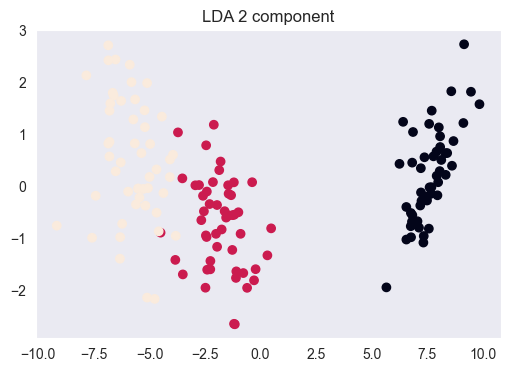

In [223]:
lda = LinearDiscriminantAnalysis(n_components=2).fit(X, y)
X_lda=lda.transform(X)
fig = plt.figure(figsize=(6,4))
legend=[]
plt.title('LDA 2 component')
plt.scatter(X_lda[:,0],X_lda[:,1],c=y)
plt.grid()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.5, random_state=42)
md1=GaussianNB().fit(X_train, y_train)
md2=LogisticRegression(max_iter=110).fit(X_train, y_train)
nb_pred=md1.predict(X_test)
lr_pred=md2.predict(X_test)

In [243]:
print(cr(y_test,nb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.83      0.87      0.85        23
           2       0.86      0.83      0.84        23

    accuracy                           0.91        75
   macro avg       0.90      0.90      0.90        75
weighted avg       0.91      0.91      0.91        75



In [244]:
print(cr(y_test,lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.91      0.91      0.91        23
           2       0.91      0.91      0.91        23

    accuracy                           0.95        75
   macro avg       0.94      0.94      0.94        75
weighted avg       0.95      0.95      0.95        75



Линейный ДА справился с задачей лучше, но всё-равно есть пересечения, можно сделать вывод, что и выделение главных компонент и линейный дискриминантный анализ возможны для применения в целях упрощения вычислений и снижения размерности исходного пространства признаков, это отличный инструмент анализа данных, однако при применении этих алгоритмов к данным, качество классификации обученных моделей будет сравнимо с исходным или ниже для всех классификаторов, закономерности выявлены, дальнейшее обучение моделей на этих данных можно считать нецелесообразными, наилучшее качество классификации получено при исходном числе признаков